In [1]:
import numpy as np
import pandas as pd
import sys, os, time
main_folder = './../'
if main_folder not in sys.path:
    sys.path.append(main_folder)
from evolution import DifferentialEvolution
from glob       import glob
from tqdm       import tqdm

import dirs
from utils      import get_solution, ProgressBar, write_log
import matplotlib.pyplot as plt 

progbar = ProgressBar(elapsed_time=True)

### Parameters

In [2]:
# Competition Parameters
funcId      = 1
dim         = 10
numRuns     = 2
targetError = 1e-8

# Algorithm Parameters
pop_size = 300
percMaxEvals = 1
maxEvals = 'auto'
maxGenerations = None
fitness_clusters = None
crossover = 'binonial'
mutation = 'best'
n_diff = 1
lambda_mutation = .5
opposition = False
input_data_filepath = './../input_data'
active = False

In [3]:
# Parameters
algorithm = "de"
mutation = "best"
n_diff = 1
crossover = "bin"
funcId = 9
dim = 10
numRuns = 51
pop_size = 300
percMaxEvals = 0.8
lambda_mutation = 0.5
opposition = False
fitness_clusters = None
input_data_filepath = "./input_data"
active = True


In [4]:
maxEvals = maxEvals if percMaxEvals is None else percMaxEvals*10000*dim
run_tag = '[' + '_'.join([str(funcId), 
                          str(dim), 
                          str(numRuns),
                          str(pop_size), 
                          str(percMaxEvals),                                                     
                          '{}'.format(lambda_mutation), 
                          str(opposition),
                          str(fitness_clusters)
                         ])  + ']'
run_tag

'[9_10_51_300_0.8_0.5_False_None]'

In [5]:
alg = DifferentialEvolution(dim=dim, func_id=funcId, pop_size=pop_size, crossover=crossover, 
        opposition=opposition, mutation=mutation, lambda_mutation=.5, fitness_clusters=fitness_clusters)

output_filepath = os.path.join(dirs.results, str(alg))
if not os.path.exists(output_filepath):
    os.makedirs(output_filepath)
output_filepath = output_filepath + '/' + run_tag

print ('Writing log at ', output_filepath + 'log.tsv')
write_log(filepath=output_filepath + 'log.tsv', 
          mode="w+", 
          text='[{}]\trun\telapsedTime\tsuccessRate\n'.format(time.strftime("%Y-%m-%d %H:%M:%S", time.gmtime())))  

Writing log at 

./results/DE/best/1/bin/[9_10_51_300_0.8_0.5_False_None]log.tsv

In [6]:
hist = pd.DataFrame()
arr_runs = range(numRuns)
solution = get_solution(funcId, dim, input_data_filepath=input_data_filepath)
successRate = 0
for idx_run in arr_runs:
    progbar.update_progress(idx_run/float(len(arr_runs)))
    
    # Differential Evolution
    alg = DifferentialEvolution(dim=dim, func_id=funcId, pop_size=pop_size, crossover=crossover, 
        opposition=opposition, mutation=mutation, lambda_mutation=.5, fitness_clusters=fitness_clusters)
    
    errorHist, fitnessHist = alg.optimize(target=solution, max_f_evals=maxEvals, target_error=targetError, verbose=True)        
    bestError = errorHist.iloc[-1,:].min()
    errorHist["run"] = np.ones(errorHist.shape[0], dtype=int)*idx_run
    hist = pd.concat([hist, errorHist], ignore_index=False)    
    if bestError <= targetError:
        print ("Target error achieved with error {}".format(bestError))
        successRate += 1
    
    write_log(filepath=output_filepath + 'log.tsv', 
              text='[{}]\t{}/{}\t{}\t{}\n'.format(time.strftime("%Y-%m-%d %H:%M:%S", time.gmtime()), 
                                              idx_run+1,
                                              len(arr_runs),
                                              progbar.get_elapsed_time(),
                                              successRate)
             )
    
hist.index.name = 'generation'
hist.to_csv(output_filepath + 'hist.tsv', sep='\t')
progbar.update_progress(1)

[0:00:00][----------] 0.00% 

Optimization ended due to max fitness evals (max = 80000.0, curr = 79800)


#Generations:	264

#FitnessEvals:	79800

Mean Fitness:	956.3936

Best Fitness:	930.9874
Solution:	900.0000
Diff:		30.9874

[0:10:20][----------] 1.96% 

Optimization ended due to max fitness evals (max = 80000.0, curr = 79800)


#Generations:	264

#FitnessEvals:	79800

Mean Fitness:	963.0167

Best Fitness:	930.8123
Solution:	900.0000
Diff:		30.8123

[0:20:31][----------] 3.92% 

Optimization ended due to max fitness evals (max = 80000.0, curr = 79800)


#Generations:	264

#FitnessEvals:	79800

Mean Fitness:	957.2288

Best Fitness:	925.7799
Solution:	900.0000
Diff:		25.7799

[0:30:13][#---------] 5.88% 

Optimization ended due to max fitness evals (max = 80000.0, curr = 79800)


#Generations:	264

#FitnessEvals:	79800

Mean Fitness:	956.5934

Best Fitness:	925.2964
Solution:	900.0000
Diff:		25.2964

[0:39:31][#---------] 7.84% 

Optimization ended due to max fitness evals (max = 80000.0, curr = 79800)


#Generations:	264

#FitnessEvals:	79800

Mean Fitness:	956.0409

Best Fitness:	928.4554
Solution:	900.0000
Diff:		28.4554

[0:47:48][#---------] 9.80% 

Optimization ended due to max fitness evals (max = 80000.0, curr = 79800)


#Generations:	264

#FitnessEvals:	79800

Mean Fitness:	962.0274

Best Fitness:	934.8382
Solution:	900.0000
Diff:		34.8382

[0:55:56][#---------] 11.76% 

Optimization ended due to max fitness evals (max = 80000.0, curr = 79800)


#Generations:	264

#FitnessEvals:	79800

Mean Fitness:	957.1861

Best Fitness:	924.0519
Solution:	900.0000
Diff:		24.0519

[1:04:07][#---------] 13.73% 

Optimization ended due to max fitness evals (max = 80000.0, curr = 79800)


#Generations:	264

#FitnessEvals:	79800

Mean Fitness:	963.5132

Best Fitness:	938.2189
Solution:	900.0000
Diff:		38.2189

[1:12:30][##--------] 15.69% 

Optimization ended due to max fitness evals (max = 80000.0, curr = 79800)


#Generations:	264

#FitnessEvals:	79800

Mean Fitness:	959.2953

Best Fitness:	920.8916
Solution:	900.0000
Diff:		20.8916

[1:21:00][##--------] 17.65% 

Optimization ended due to max fitness evals (max = 80000.0, curr = 79800)


#Generations:	264

#FitnessEvals:	79800

Mean Fitness:	964.5781

Best Fitness:	927.0492
Solution:	900.0000
Diff:		27.0492

[1:28:58][##--------] 19.61% 

Optimization ended due to max fitness evals (max = 80000.0, curr = 79800)


#Generations:	264

#FitnessEvals:	79800

Mean Fitness:	961.4027

Best Fitness:	934.2198
Solution:	900.0000
Diff:		34.2198

[1:36:40][##--------] 21.57% 

Optimization ended due to max fitness evals (max = 80000.0, curr = 79800)


#Generations:	264

#FitnessEvals:	79800

Mean Fitness:	959.2119

Best Fitness:	929.6659
Solution:	900.0000
Diff:		29.6659

[1:43:36][##--------] 23.53% 

Optimization ended due to max fitness evals (max = 80000.0, curr = 79800)


#Generations:	264

#FitnessEvals:	79800

Mean Fitness:	955.9816

Best Fitness:	930.9439
Solution:	900.0000
Diff:		30.9439

[1:50:41][###-------] 25.49% 

Optimization ended due to max fitness evals (max = 80000.0, curr = 79800)


#Generations:	264

#FitnessEvals:	79800

Mean Fitness:	966.1950

Best Fitness:	936.8644
Solution:	900.0000
Diff:		36.8644

[1:57:51][###-------] 27.45% 

Optimization ended due to max fitness evals (max = 80000.0, curr = 79800)


#Generations:	264

#FitnessEvals:	79800

Mean Fitness:	965.1322

Best Fitness:	937.6557
Solution:	900.0000
Diff:		37.6557

[2:04:50][###-------] 29.41% 

Optimization ended due to max fitness evals (max = 80000.0, curr = 79800)


#Generations:	264

#FitnessEvals:	79800

Mean Fitness:	967.3948

Best Fitness:	940.0382
Solution:	900.0000
Diff:		40.0382

[2:12:12][###-------] 31.37% 

Optimization ended due to max fitness evals (max = 80000.0, curr = 79800)


#Generations:	264

#FitnessEvals:	79800

Mean Fitness:	958.3459

Best Fitness:	925.0325
Solution:	900.0000
Diff:		25.0325

[2:19:19][###-------] 33.33% 

Optimization ended due to max fitness evals (max = 80000.0, curr = 79800)


#Generations:	264

#FitnessEvals:	79800

Mean Fitness:	962.2104

Best Fitness:	933.3032
Solution:	900.0000
Diff:		33.3032

[2:25:37][####------] 35.29% 

Optimization ended due to max fitness evals (max = 80000.0, curr = 79800)


#Generations:	264

#FitnessEvals:	79800

Mean Fitness:	956.5192

Best Fitness:	932.4243
Solution:	900.0000
Diff:		32.4243

[2:31:48][####------] 37.25% 

Optimization ended due to max fitness evals (max = 80000.0, curr = 79800)


#Generations:	264

#FitnessEvals:	79800

Mean Fitness:	964.2538

Best Fitness:	939.1852
Solution:	900.0000
Diff:		39.1852

[2:38:07][####------] 39.22% 

Optimization ended due to max fitness evals (max = 80000.0, curr = 79800)


#Generations:	264

#FitnessEvals:	79800

Mean Fitness:	955.9220

Best Fitness:	926.2193
Solution:	900.0000
Diff:		26.2193

[2:44:01][####------] 41.18% 

Optimization ended due to max fitness evals (max = 80000.0, curr = 79800)


#Generations:	264

#FitnessEvals:	79800

Mean Fitness:	956.4158

Best Fitness:	926.2687
Solution:	900.0000
Diff:		26.2687

[2:49:59][####------] 43.14% 

Optimization ended due to max fitness evals (max = 80000.0, curr = 79800)


#Generations:	264

#FitnessEvals:	79800

Mean Fitness:	959.0697

Best Fitness:	925.7238
Solution:	900.0000
Diff:		25.7238

[2:56:11][#####-----] 45.10% 

Optimization ended due to max fitness evals (max = 80000.0, curr = 79800)


#Generations:	264

#FitnessEvals:	79800

Mean Fitness:	961.0785

Best Fitness:	930.3368
Solution:	900.0000
Diff:		30.3368

[3:02:22][#####-----] 47.06% 

Optimization ended due to max fitness evals (max = 80000.0, curr = 79800)


#Generations:	264

#FitnessEvals:	79800

Mean Fitness:	959.2079

Best Fitness:	928.8237
Solution:	900.0000
Diff:		28.8237

[3:07:46][#####-----] 49.02% 

Optimization ended due to max fitness evals (max = 80000.0, curr = 79800)


#Generations:	264

#FitnessEvals:	79800

Mean Fitness:	951.7478

Best Fitness:	917.6582
Solution:	900.0000
Diff:		17.6582

[3:12:56][#####-----] 50.98% 

Optimization ended due to max fitness evals (max = 80000.0, curr = 79800)


#Generations:	264

#FitnessEvals:	79800

Mean Fitness:	962.0591

Best Fitness:	930.4244
Solution:	900.0000
Diff:		30.4244

[3:18:19][#####-----] 52.94% 

Optimization ended due to max fitness evals (max = 80000.0, curr = 79800)


#Generations:	264

#FitnessEvals:	79800

Mean Fitness:	960.0303

Best Fitness:	930.4207
Solution:	900.0000
Diff:		30.4207

[3:23:36][#####-----] 54.90% 

Optimization ended due to max fitness evals (max = 80000.0, curr = 79800)


#Generations:	264

#FitnessEvals:	79800

Mean Fitness:	959.7380

Best Fitness:	935.1636
Solution:	900.0000
Diff:		35.1636

[3:28:49][######----] 56.86% 

Optimization ended due to max fitness evals (max = 80000.0, curr = 79800)


#Generations:	264

#FitnessEvals:	79800

Mean Fitness:	959.1761

Best Fitness:	929.7638
Solution:	900.0000
Diff:		29.7638

[3:33:59][######----] 58.82% 

Optimization ended due to max fitness evals (max = 80000.0, curr = 79800)


#Generations:	264

#FitnessEvals:	79800

Mean Fitness:	960.6767

Best Fitness:	935.6169
Solution:	900.0000
Diff:		35.6169

[3:39:13][######----] 60.78% 

Optimization ended due to max fitness evals (max = 80000.0, curr = 79800)


#Generations:	264

#FitnessEvals:	79800

Mean Fitness:	963.5867

Best Fitness:	935.2112
Solution:	900.0000
Diff:		35.2112

[3:43:35][######----] 62.75% 

Optimization ended due to max fitness evals (max = 80000.0, curr = 79800)


#Generations:	264

#FitnessEvals:	79800

Mean Fitness:	964.3891

Best Fitness:	926.1731
Solution:	900.0000
Diff:		26.1731

[3:47:57][######----] 64.71% 

Optimization ended due to max fitness evals (max = 80000.0, curr = 79800)


#Generations:	264

#FitnessEvals:	79800

Mean Fitness:	954.5401

Best Fitness:	930.8469
Solution:	900.0000
Diff:		30.8469

[3:52:15][#######---] 66.67% 

Optimization ended due to max fitness evals (max = 80000.0, curr = 79800)


#Generations:	264

#FitnessEvals:	79800

Mean Fitness:	958.5681

Best Fitness:	929.8554
Solution:	900.0000
Diff:		29.8554

[3:56:34][#######---] 68.63% 

Optimization ended due to max fitness evals (max = 80000.0, curr = 79800)


#Generations:	264

#FitnessEvals:	79800

Mean Fitness:	957.7734

Best Fitness:	927.0028
Solution:	900.0000
Diff:		27.0028

[4:00:50][#######---] 70.59% 

Optimization ended due to max fitness evals (max = 80000.0, curr = 79800)


#Generations:	264

#FitnessEvals:	79800

Mean Fitness:	959.3274

Best Fitness:	924.2887
Solution:	900.0000
Diff:		24.2887

[4:05:10][#######---] 72.55% 

Optimization ended due to max fitness evals (max = 80000.0, curr = 79800)


#Generations:	264

#FitnessEvals:	79800

Mean Fitness:	967.3290

Best Fitness:	943.7823
Solution:	900.0000
Diff:		43.7823

[4:09:15][#######---] 74.51% 

Optimization ended due to max fitness evals (max = 80000.0, curr = 79800)


#Generations:	264

#FitnessEvals:	79800

Mean Fitness:	959.4099

Best Fitness:	935.6339
Solution:	900.0000
Diff:		35.6339

[4:12:44][########--] 76.47% 

Optimization ended due to max fitness evals (max = 80000.0, curr = 79800)


#Generations:	264

#FitnessEvals:	79800

Mean Fitness:	961.4635

Best Fitness:	933.9065
Solution:	900.0000
Diff:		33.9065

[4:16:15][########--] 78.43% 

Optimization ended due to max fitness evals (max = 80000.0, curr = 79800)


#Generations:	264

#FitnessEvals:	79800

Mean Fitness:	965.7381

Best Fitness:	934.0386
Solution:	900.0000
Diff:		34.0386

[4:19:44][########--] 80.39% 

Optimization ended due to max fitness evals (max = 80000.0, curr = 79800)


#Generations:	264

#FitnessEvals:	79800

Mean Fitness:	959.7237

Best Fitness:	936.0129
Solution:	900.0000
Diff:		36.0129

[4:23:09][########--] 82.35% 

Optimization ended due to max fitness evals (max = 80000.0, curr = 79800)


#Generations:	264

#FitnessEvals:	79800

Mean Fitness:	963.4401

Best Fitness:	934.8612
Solution:	900.0000
Diff:		34.8612

[4:26:35][########--] 84.31% 

Optimization ended due to max fitness evals (max = 80000.0, curr = 79800)


#Generations:	264

#FitnessEvals:	79800

Mean Fitness:	956.9440

Best Fitness:	927.5010
Solution:	900.0000
Diff:		27.5010

[4:30:02][#########-] 86.27% 

Optimization ended due to max fitness evals (max = 80000.0, curr = 79800)


#Generations:	264

#FitnessEvals:	79800

Mean Fitness:	964.1098

Best Fitness:	936.9291
Solution:	900.0000
Diff:		36.9291

[4:33:05][#########-] 88.24% 

Optimization ended due to max fitness evals (max = 80000.0, curr = 79800)


#Generations:	264

#FitnessEvals:	79800

Mean Fitness:	950.4045

Best Fitness:	916.1887
Solution:	900.0000
Diff:		16.1887

[4:35:47][#########-] 90.20% 

Optimization ended due to max fitness evals (max = 80000.0, curr = 79800)


#Generations:	264

#FitnessEvals:	79800

Mean Fitness:	960.5818

Best Fitness:	935.5811
Solution:	900.0000
Diff:		35.5811

[4:38:29][#########-] 92.16% 

Optimization ended due to max fitness evals (max = 80000.0, curr = 79800)


#Generations:	264

#FitnessEvals:	79800

Mean Fitness:	959.5187

Best Fitness:	931.8195
Solution:	900.0000
Diff:		31.8195

[4:41:14][#########-] 94.12% 

Optimization ended due to max fitness evals (max = 80000.0, curr = 79800)


#Generations:	264

#FitnessEvals:	79800

Mean Fitness:	958.9886

Best Fitness:	927.2308
Solution:	900.0000
Diff:		27.2308

[4:43:57][##########] 96.08% 

Optimization ended due to max fitness evals (max = 80000.0, curr = 79800)


#Generations:	264

#FitnessEvals:	79800

Mean Fitness:	962.2417

Best Fitness:	938.2168
Solution:	900.0000
Diff:		38.2168

[4:46:38][##########] 98.04% 

Optimization ended due to max fitness evals (max = 80000.0, curr = 79800)


#Generations:	264

#FitnessEvals:	79800

Mean Fitness:	954.7794

Best Fitness:	927.2857
Solution:	900.0000
Diff:		27.2857

[4:49:26][##########] 100.00% Done...


In [7]:
print ("Elapsed Time: ", progbar.get_elapsed_time())

Elapsed Time: 

4:49:26

In [8]:
errorHist.tail()

,0,1,2,3,4,5,6,7,8,9,...,291,292,293,294,295,296,297,298,299,run
generation,,,,,,,,,,,,,,,,,,,,,
259,48.848392,65.96685,54.803608,57.166478,55.094666,48.825843,60.124369,69.754735,50.641478,56.452786,...,55.020813,55.929544,46.330436,46.616996,58.590554,52.489994,49.73835,47.760188,46.801948,50
260,48.848392,65.96685,54.803608,57.166478,55.094666,48.825843,60.124369,69.754735,50.641478,56.452786,...,55.020813,55.929544,46.330436,46.616996,58.590554,52.489994,49.73835,47.760188,46.801948,50
261,48.848392,65.96685,54.803608,57.166478,55.094666,48.825843,60.124369,69.754735,50.641478,56.452786,...,55.020813,55.929544,46.330436,46.616996,58.590554,52.489994,49.73835,47.760188,46.801948,50
262,48.848392,65.96685,54.803608,57.166478,55.094666,48.825843,60.124369,69.754735,50.641478,56.452786,...,55.020813,55.929544,46.330436,46.616996,58.590554,52.489994,49.73835,47.760188,46.801948,50
263,48.848392,65.96685,54.803608,57.166478,55.094666,48.825843,60.124369,69.754735,50.641478,56.452786,...,55.020813,55.929544,46.330436,42.243543,58.590554,52.489994,49.73835,47.760188,46.801948,50


In [9]:
arr_error = list()
arr_best_error = list()
for run in hist['run'].unique():
    df_run = hist[hist['run'] == run].drop(['run'], axis=1) 
    bestError = df_run.iloc[-1,:].min()    
    arr_best_error.append(bestError)    
    print ('Best error for run {}: {}'.format(run, bestError))
    arr_error.append(np.array(df_run.min(axis=1)))    
arr_error = np.array(arr_error)
# arr_error

Best error for run 0: 30.987388187077386

Best error for run 1: 30.812331642456

Best error for run 2: 25.7798635191034

Best error for run 3: 25.296363575453142

Best error for run 4: 28.455413910018933

Best error for run 5: 34.838233969823705

Best error for run 6: 24.051914346235208

Best error for run 7: 38.218914031550526

Best error for run 8: 20.891618216017378

Best error for run 9: 27.049247302557433

Best error for run 10: 34.219789845451146

Best error for run 11: 29.665858339386773

Best error for run 12: 30.94394024193946

Best error for run 13: 36.864434429649236

Best error for run 14: 37.65565645589459

Best error for run 15: 40.03822174886125

Best error for run 16: 25.03254724361807

Best error for run 17: 33.30320801704988

Best error for run 18: 32.424338002732384

Best error for run 19: 39.18523046961286

Best error for run 20: 26.219342953703972

Best error for run 21: 26.26871735875261

Best error for run 22: 25.723774370064234

Best error for run 23: 30.336778000175514

Best error for run 24: 28.823723811525497

Best error for run 25: 17.6582393277331

Best error for run 26: 30.42439745764034

Best error for run 27: 30.420749673396244

Best error for run 28: 35.163552377189376

Best error for run 29: 29.763754650156216

Best error for run 30: 35.61693972388571

Best error for run 31: 35.211196071629274

Best error for run 32: 26.173085875173683

Best error for run 33: 30.846898632452053

Best error for run 34: 29.8553740949975

Best error for run 35: 27.00277351444015

Best error for run 36: 24.288658643491885

Best error for run 37: 43.78227561153017

Best error for run 38: 35.63392773949727

Best error for run 39: 33.90647788441811

Best error for run 40: 34.03862557268667

Best error for run 41: 36.01287711397663

Best error for run 42: 34.861244131426474

Best error for run 43: 27.50097975119013

Best error for run 44: 36.92912994982794

Best error for run 45: 16.18865758258437

Best error for run 46: 35.58113174364462

Best error for run 47: 31.819498652234756

Best error for run 48: 27.230827933544788

Best error for run 49: 38.21684966247176

Best error for run 50: 27.28574307147835

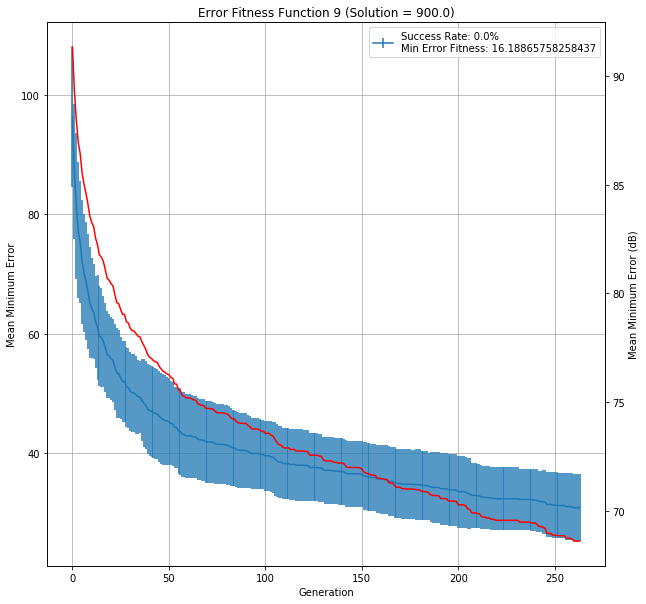

In [10]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10,10))
label = 'Success Rate: {}%\nMin Error Fitness: {}'.format(100*(successRate/float(numRuns)), arr_error.min())
ax.errorbar(np.arange(alg.generations), arr_error.mean(axis=0), yerr=arr_error.std(axis=0), label=label)
ax2 = ax.twinx()
ax2.plot(np.arange(alg.generations), 20*np.log(arr_error.mean(axis=0)), label='Mean Min Error (dB)', color='red')
ax2.set_ylabel('Mean Minimum Error (dB)')

ax.grid(True)
ax.set_ylabel('Mean Minimum Error')
ax.legend()
ax.set_xlabel('Generation')
ax.set_title('Error Fitness Function {} (Solution = {})'.format(funcId, solution))
plt.savefig(output_filepath + 'mean_error_evolution.jpeg', bbox_inches = 'tight')

In [11]:
df_sumup = pd.DataFrame(columns=['algorithm', '#Fc', 'D', 'percFES'] + ['run_' + str(i) for i in np.arange(1,numRuns+1,1)] + ['mean', 'elapsed_time', 'evals'])
df_sumup.loc[df_sumup.shape[0]] = [str(alg), funcId, dim, percMaxEvals] + arr_best_error + [np.mean(arr_best_error), progbar.get_elapsed_time(), alg.fitnessEvals]
print ('Saving df_sumup to ', output_filepath + 'df_sumup.tsv')
df_sumup.to_csv(output_filepath + 'df_sumup.tsv', sep='\t')
df_sumup

Saving df_sumup to 

./results/DE/best/1/bin/[9_10_51_300_0.8_0.5_False_None]df_sumup.tsv

,algorithm,#Fc,D,percFES,run_1,run_2,run_3,run_4,run_5,run_6,...,run_45,run_46,run_47,run_48,run_49,run_50,run_51,mean,elapsed_time,evals
0,DE/best/1/bin,9,10,0.8,30.987388,30.812332,25.779864,25.296364,28.455414,34.838234,...,36.92913,16.188658,35.581132,31.819499,27.230828,38.21685,27.285743,30.872563,4:49:26,79800
